In [1]:
import warnings
import numpy as np
from numpy import argmax
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Conv2D, MaxPooling2D, Embedding
from keras.layers import Activation, Dropout, Flatten, Dense, LSTM, BatchNormalization
from scipy.misc import imsave
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import pickle
import PIL
warnings.filterwarnings('ignore')
%pylab inline

Using TensorFlow backend.


Populating the interactive namespace from numpy and matplotlib


In [2]:
fd = open('asphalt/1545669611.1566238', 'rb')
dataset = pickle.load(fd)

def data(dataset):
    i=0
    for k in dataset:
        i=i+1
        print(k)
        if(i>20):
            break

def displayData(k):
    print('Time {}, Shape : {}, Key : {}, Type {}'.format(k,dataset[k]['data'].shape,dataset[k]['key'],dataset[k]['type']))
    return PIL.Image.fromarray(dataset[k]['data'])

data(dataset)

1545664215.3010664
1545664215.4150603
1545664215.918066
1545664215.9996667
1545664220.3332438
1545664220.4462438
1545664220.482244
1545664220.581247
1545664223.4771285
1545664224.5981386
1545664224.7621388
1545664224.8781831
1545664225.1122603
1545664225.1652613
1545664225.2772617
1545664225.3512614
1545664230.2693489
1545664230.389348
1545664233.021304
1545664235.6943738
1545664237.2794883


Time 1545664215.3010664, Shape : (245, 480), Key : space, Type down


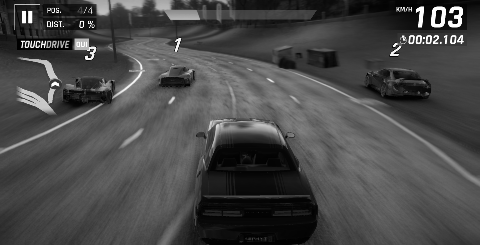

In [3]:
displayData(1545664215.3010664)

In [4]:
#CONFIG
size_len=245*480


In [5]:
#print(dataset[1545566870.1522963]['data'].shape)
first_val = list(dataset.values())[0]['data']
n_pixels = np.prod(first_val.shape[1:])
print(n_pixels,len(first_val))

#Flatten array
#X_train = np.array([dataset[v]['data'].reshape( (1,size_len)) for v in dataset])
X_train = np.array([dataset[v]['data'] for v in dataset])
print(X_train[:1])

X_train = X_train.astype('float32') / 255.
print(X_train[:5])

for i in X_train:
    print(i[0])
    break

#X_train = np.array([ v[0] for v in X_train ])
X_data = np.array([ v[0] for v in X_train ])

print(X_train.shape)
print(X_train[:5])

480 245
[[[18 20 20 ... 14 14 14]
  [23 21 23 ...  9  9  9]
  [25 20 23 ...  8  8  8]
  ...
  [47 49 49 ... 58 57 57]
  [48 48 49 ... 57 57 56]
  [48 48 50 ... 56 57 56]]]
[[[0.07058824 0.07843138 0.07843138 ... 0.05490196 0.05490196 0.05490196]
  [0.09019608 0.08235294 0.09019608 ... 0.03529412 0.03529412 0.03529412]
  [0.09803922 0.07843138 0.09019608 ... 0.03137255 0.03137255 0.03137255]
  ...
  [0.18431373 0.19215687 0.19215687 ... 0.22745098 0.22352941 0.22352941]
  [0.1882353  0.1882353  0.19215687 ... 0.22352941 0.22352941 0.21960784]
  [0.1882353  0.1882353  0.19607843 ... 0.21960784 0.22352941 0.21960784]]

 [[0.06666667 0.1254902  0.10980392 ... 0.02745098 0.03137255 0.03137255]
  [0.05098039 0.12156863 0.11764706 ... 0.04313726 0.04705882 0.04705882]
  [0.07058824 0.10588235 0.12156863 ... 0.05098039 0.04705882 0.04705882]
  ...
  [0.1764706  0.1764706  0.1764706  ... 0.22745098 0.22745098 0.23529412]
  [0.16862746 0.16470589 0.16862746 ... 0.23921569 0.22745098 0.22745098]


In [6]:
def cattoint(val):
    if val =='space_down':
        return 1
    if val =='s_down':
        return 2
    if val =='a_down':
        return 3
    if val =='d_down':
        return 4
    if val =='space_up':
        return 5
    if val =='s_up':
        return 6
    if val =='a_up':
        return 7
    if val =='d_up':
        return 8
    return 0

Y_train = np.array([ cattoint(dataset[v]['key']+'_'+dataset[v]['type']) for v in dataset])
print(Y_train)
Y_train=to_categorical(Y_train)
print(Y_train[:20])

[1 5 1 ... 1 5 0]
[[0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0.]]


In [7]:
print(X_train.shape)
print(Y_train.shape)

nb_cat=len(Y_train[0])
print(nb_cat)

(3090, 245, 480)
(3090, 9)
9


In [8]:
#Nos AI

def ModelConv(dropout=None):
    model = Sequential()
    model.add(Conv1D(filters=40,kernel_size=25,input_shape=X_train.shape[1:],activation='relu',strides=1))
    model.add(MaxPooling1D(pool_size = (20), strides=(10)))

    if dropout == 'Drop':
        model.add(Dropout(0.25))
    if dropout == 'Norm':
        model.add(BatchNormalization())
    model.add(Conv1D(filters=20,kernel_size=15,activation='relu',strides=1))
    model.add(MaxPooling1D())
    model.add(Flatten())
    model.add(Dense(nb_cat, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
    return model

def ModelDense(): 
    model = Sequential()
    #model.add(Embedding(input_dim=size_len,output_dim=size_len))
    model.add(Dense(100,input_shape=X_data.shape[1:], activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(75))
    model.add(Dropout(0.25))
    model.add(Dense(50))
    model.add(Dropout(0.25))
    model.add(Dense(25))
    model.add(Dense(nb_cat, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adagrad', metrics=['accuracy'])
    return model

def ModelLSTM():
    model = Sequential()
    #model.add(Conv1D(filters=40,kernel_size=25,input_shape=X_train.shape[1:],activation='relu',strides=1))
    #model.add(MaxPooling1D(pool_size = (20), strides=(10)))
    model.add(LSTM(50, return_sequences=True))
    model.add(Dropout(0.20))
    model.add(LSTM(25, return_sequences=True))
    model.add(Flatten())
    model.add(Dense(nb_cat, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
    return model

In [9]:
# apprentissage
model = ModelConv('Norm')
history = model.fit(X_train, Y_train, epochs=50, verbose=1)

Epoch 1/50
3090/3090 [==============================] - 10s 3ms/step - loss: 1.9919 - acc: 0.2453
Epoch 2/50
3090/3090 [==============================] - 4s 1ms/step - loss: 1.8436 - acc: 0.2589
Epoch 3/50
3090/3090 [==============================] - 4s 1ms/step - loss: 1.7855 - acc: 0.2738
Epoch 4/50
3090/3090 [==============================] - 4s 1ms/step - loss: 1.7380 - acc: 0.2880
Epoch 5/50
3090/3090 [==============================] - 4s 1ms/step - loss: 1.6929 - acc: 0.2861
Epoch 6/50
3090/3090 [==============================] - 4s 1ms/step - loss: 1.6824 - acc: 0.3016
Epoch 7/50
3090/3090 [==============================] - 4s 1ms/step - loss: 1.5780 - acc: 0.3337
Epoch 8/50
3090/3090 [==============================] - 4s 1ms/step - loss: 1.5554 - acc: 0.3278
Epoch 9/50
3090/3090 [==============================] - 4s 1ms/step - loss: 1.4702 - acc: 0.3741
Epoch 10/50
3090/3090 [==============================] - 4s 1ms/step - loss: 1.4099 - acc: 0.3783
Epoch 11/50
3090/3090 [=====

In [10]:
#Dense
#pred = model.predict(X_train[:150].reshape((150,size_len)), verbose=1)
#Conv1d
pred = model.predict([[X_train[6]]], verbose=1)

print(pred)

print(argmax(pred))

1/1 [==============================] - 0s 160ms/step
[[1.5686075e-04 2.4830474e-01 1.2636523e-01 6.8058699e-02 5.7792228e-02
  2.4507475e-01 1.3035274e-01 6.8278193e-02 5.5616543e-02]]
1


In [11]:
#model.save('model_lstm_xxx.h5')

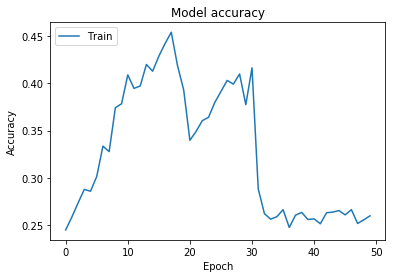

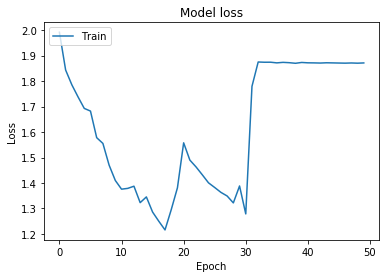

In [12]:
# Plot training & validation accuracy values
plt.plot(history.history['acc'])
#plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()